In [1]:
%load_ext autoreload
import sys
import gc
from dataclasses import dataclass
import numpy as np
import matplotlib.pyplot as plt
import scqubits as scq

In [2]:
from utilities.coupled_fluxonium import *
from utilities.rings import *
from utilities.branch_analysis_w_chain import *
from utilities.processing import *

In [3]:
path = r'C:\Users\ecsadmin\Desktop\MIST_DAT\symmetry_big_check'
composite = get_expects(path, 6)

dict_keys([0, 1, 2, 3, 4, 5, 6])


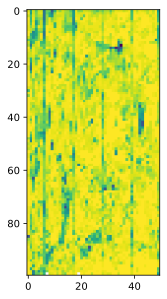

In [4]:
plt.imshow(composite[4].T)

In [5]:
key_list  = [0, 1, 2, 3]
name_list = [r'$⟨n_c⟩ = 0$', r'$⟨n_c⟩ = 1$', r'$⟨n_c⟩ = 2$', r'$⟨n_c⟩ = 3$']

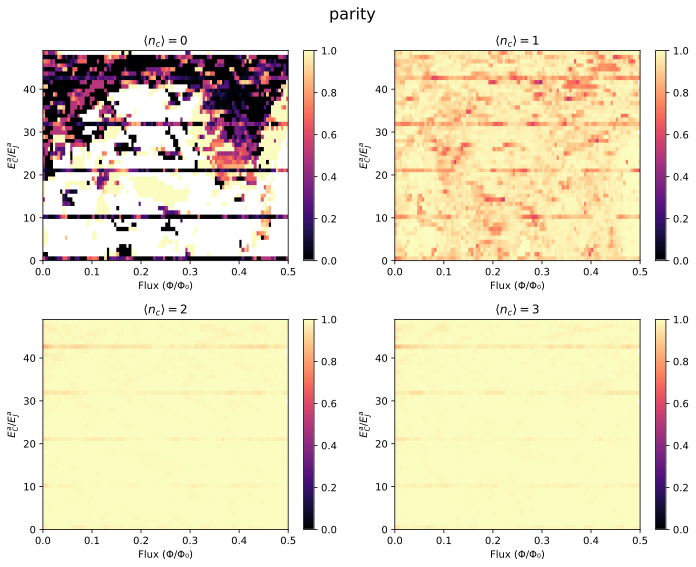

In [10]:
step =.02
flux_arr = np.arange(0, .5, step)
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
extent = [0, .5, 0, 49]
title = 'parity'
for ax, key, name in zip(axes, key_list, name_list):
    #ax.imshow(dat0[key].T, extent=extent, cmap='magma')
    ax.set_title(name)
    ax.set_xlabel('Flux (Φ/Φ₀)')
    ax.set_ylabel(r'$E_C^a/E_J^a$')
    fixed = Z_fixed = composite[key]

    im = ax.imshow(fixed, extent=extent, cmap='magma', vmin=0, vmax=1)
    ax.set_aspect("auto")

    plt.colorbar(im, ax = ax)

fig.suptitle(title, fontsize=16)
plt.tight_layout()
plt.savefig(r'parity.png')
plt.show()

In [3]:
# Setting some vals
f_trunc     = 30
ncut        = 30
osc_trunc   = 30
chain_trunc = 8
f_c         = 8
flux        = .5
lookup      = False
EJ  = 5
EL  = .1
EC  = 1
g_n = .08
g_phi = 1j * g_n
f_r = 6.6
coupling_type = 'capacitive'
chain_mode = True
fit_params = {}
# Tuple for moving stuff around

EC_a = .0001
EJ_a = 20
cg_a = 1e-6
c_a  = 1e-6
num_JJ = 204
g_chain = get_g_chain(EJ, EC_a, EJ_a, cg_a, c_a, num_JJ, chain_trunc)
print(g_chain)
g_chain = g_chain

# This may be excessive but it feels more flexible
# if things need to change
var_list = ['f_trunc', 'ncut', 'osc_trunc', 'flux', 'lookup', 'EJ', 'EL', 'EC', 'g_n', 'g_phi', 'f_r', 
            'coupling_type', 'chain_mode', 'f_c', 'chain_trunc', 'g_chain']

units = {'flux': r"$\Phi_0$"}
_locals = locals()

fit_params.update({
    name: (_locals[name], units.get(name), None)
    for name in var_list
})

0.13953620279315826


In [4]:
dat_package, H_full = get_objs(fit_params, 'fluxonium')

In [5]:
P_list, N_list, Nc_list = sectorize_H(dat_package)

checkin' vecs: 100%|###############################################################| 7200/7200 [11:08<00:00, 10.77it/s]


In [6]:
c_bin = np.round(np.abs(Nc_list))

In [7]:
from collections import defaultdict

grouped = defaultdict(list)
for expect, c in zip(P_list, c_bin):
    grouped[str(c)].append(np.real(expect))

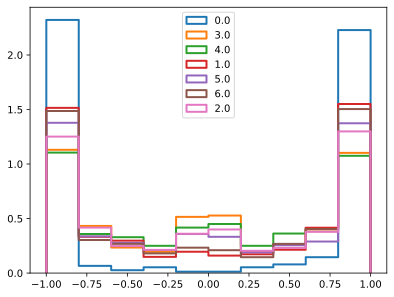

In [19]:
for key in grouped.keys():
    if key != '7.0':
        plt.hist(grouped[key], histtype='step', density=True,
                 linewidth=2, label=key, bins=10)
plt.legend()
plt.savefig(r'parity_histogram.jpg')

In [15]:
grouped_n = defaultdict(list)
for expect, c in zip(N_list, c_bin):
    real_e = np.real(expect)
    grouped_n[str(c)].append(np.abs(real_e - np.round(real_e)))

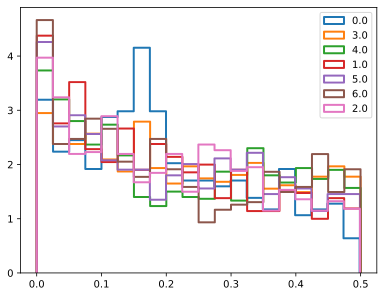

In [18]:
for key in grouped.keys():
    if key != '7.0':
        plt.hist(grouped_n[key], histtype='step', density=True,
                 linewidth=2, label=key, bins=20)
plt.legend()
plt.savefig('n_histogram.jpg')